In [59]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import json
from tqdm import tqdm
from scipy import stats
import numpy as np

In [60]:
sns.set(rc={'figure.figsize':(13, 10)})

In [61]:
def read_data(tp='foreign'):
    total = {}
    for el in os.listdir(f'probs/{tp}'):
        name = el.split('.')[0]
        if name not in total:
            total[name] = {}
        with open(f'probs/{tp}/{el}', encoding='utf-8') as f:
            total[name] = json.load(f)
    return total

In [62]:
data = read_data()

In [63]:
with open('probs/order.txt', encoding='utf-8') as f:
    order = f.read().splitlines()

In [64]:
def get_heatmap(data, key, x, order, keys=None, func=np.mean):
    small_data = {}
    for el in order:
        if el in data:
            small_data[el] = {}
            for el1 in order:
                if el1 in data[el]:
                    if keys or 'mean' in key:
                        if key == 'mean_all':
                            keys = ['width', 'width_no', 'depth', 'depth_no', 'size', 'size_no', 'sl', 'sl_no']
                        elif key == 'mean_no':
                            keys = ['width_no', 'depth_no', 'size_no', 'sl_no']
                        elif key == 'mean_yes':
                            keys = ['width', 'depth', 'size', 'sl']
                        small_data[el][el1] = func([data[el][el1][i][x] for i in keys])
                    else:
                        small_data[el][el1] = data[el][el1][key][x]
    df = pd.DataFrame(small_data).transpose().fillna(0)
    sns.heatmap(df, cmap='terrain')

In [65]:
n = 1

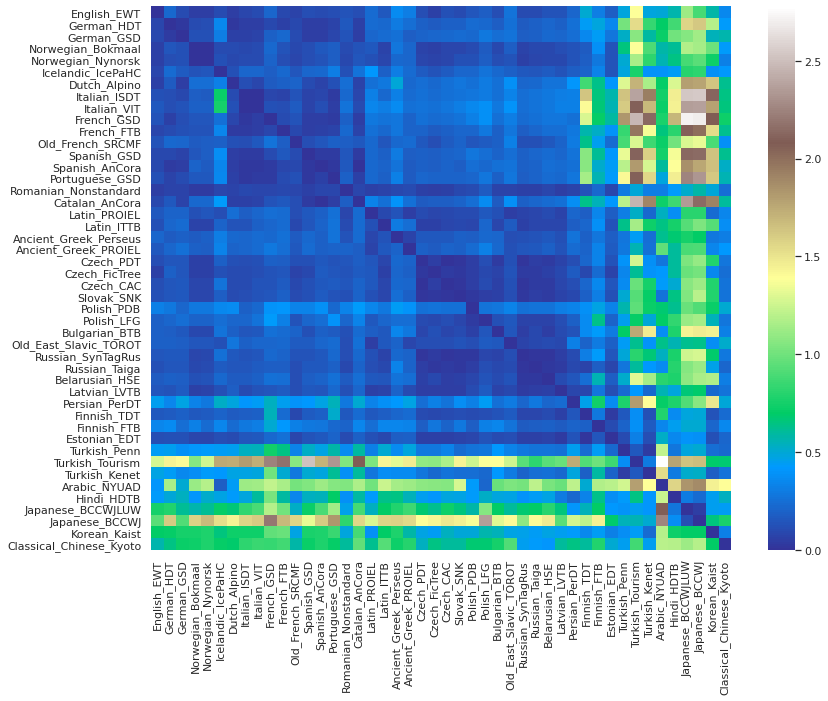

In [66]:
keys = ['width_no', 'depth_no', 'sl_no']
get_heatmap(data, 'hand', n, order, keys=keys)

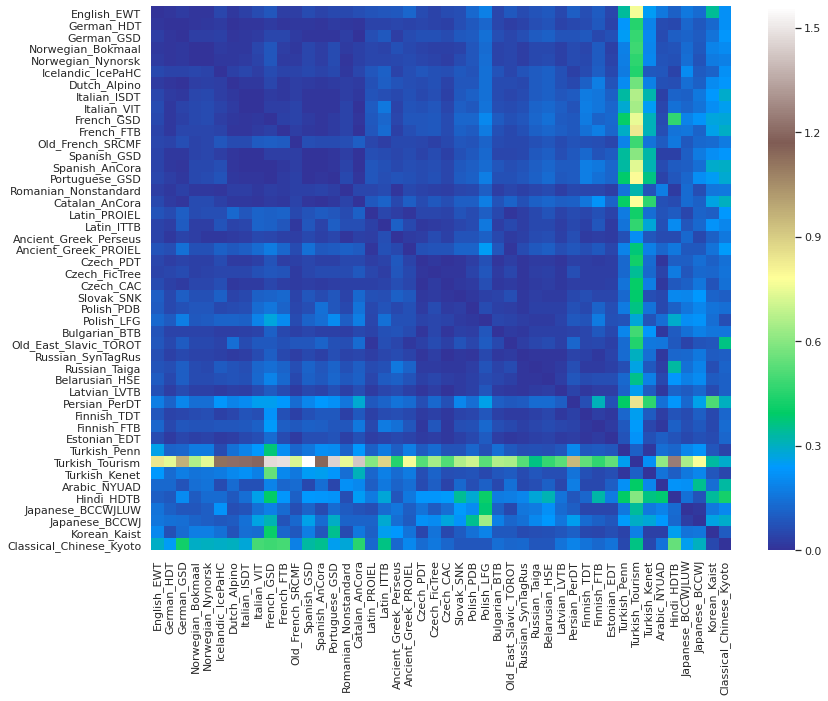

In [67]:
keys = ['width_no', 'depth_no', 'sl_no']
get_heatmap(data, 'hand', n, order, keys=keys, func=stats.gmean)

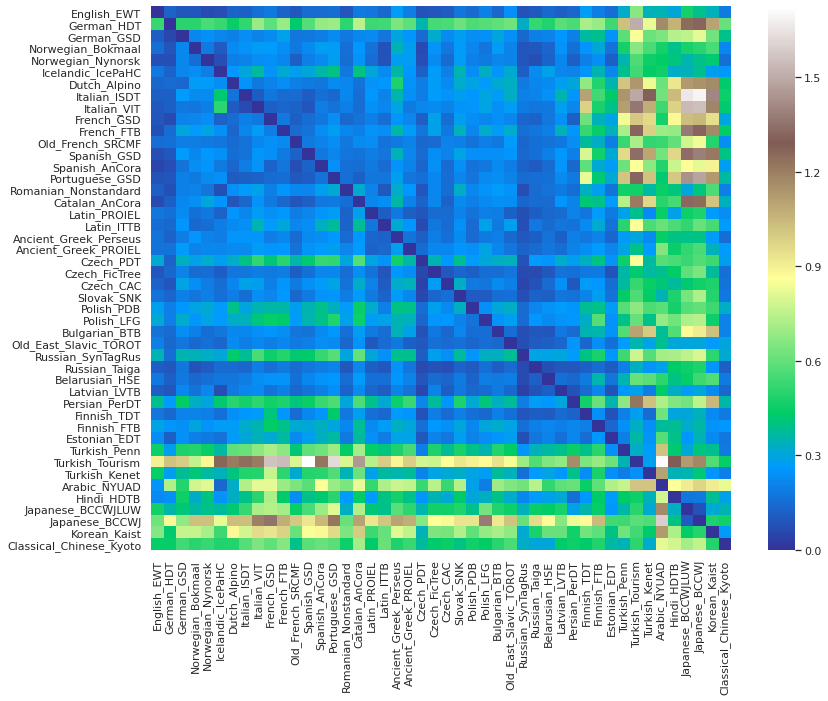

In [68]:
get_heatmap(data, 'mean_all', n, order)

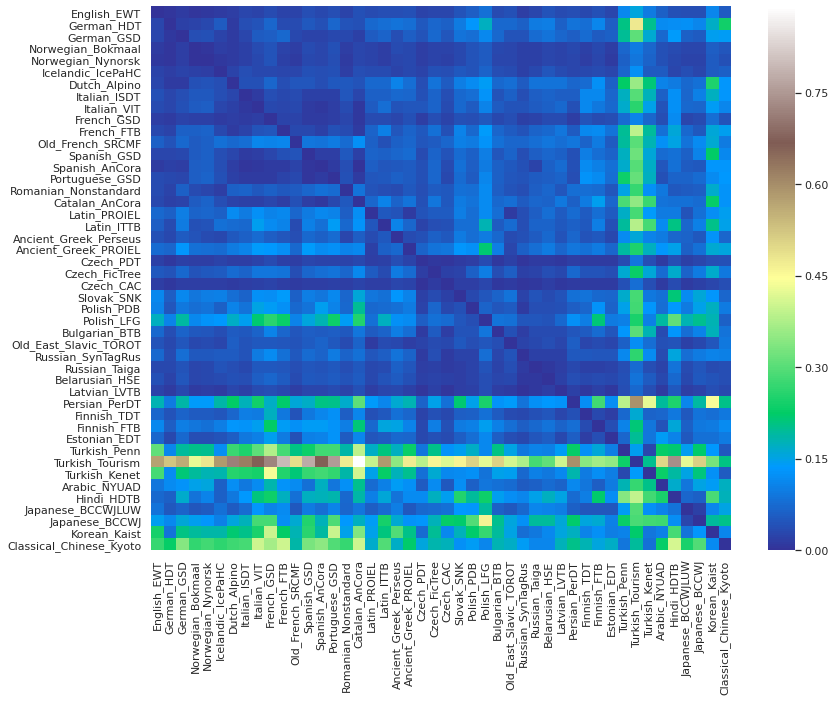

In [69]:
get_heatmap(data, 'mean_all', n, order, func=stats.gmean)

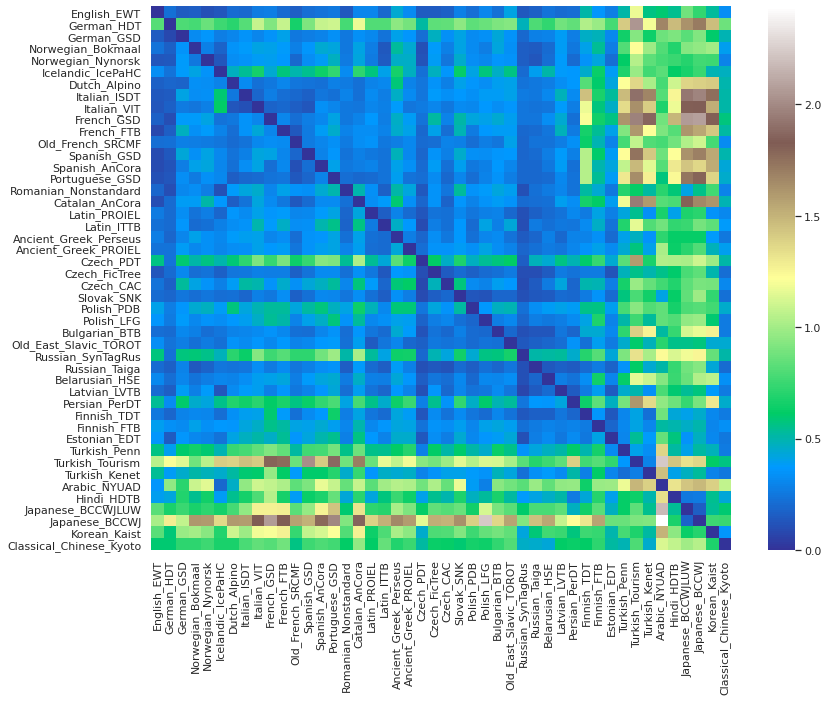

In [70]:
get_heatmap(data, 'mean_no', n, order)

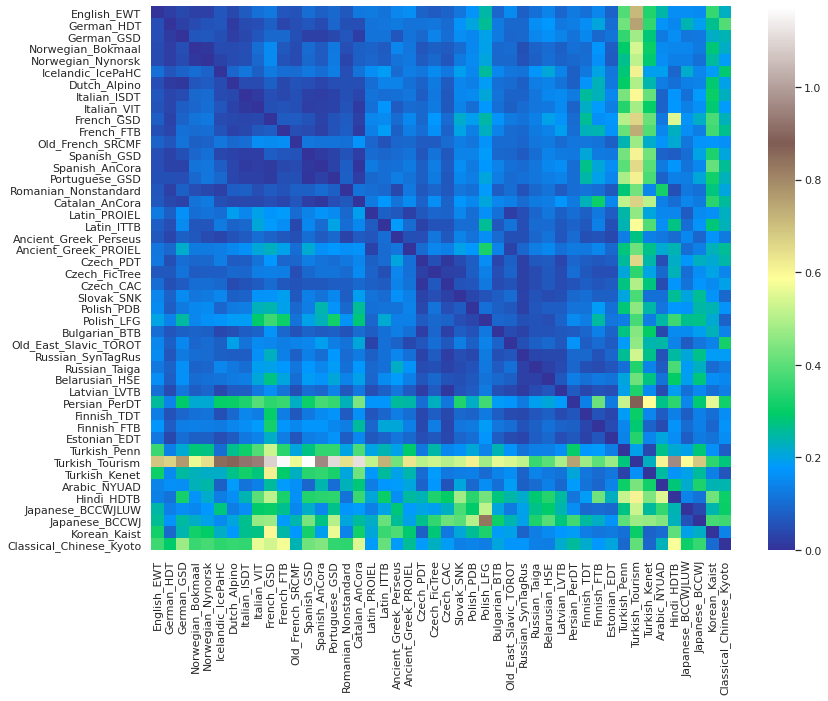

In [71]:
get_heatmap(data, 'mean_no', n, order, func=stats.gmean)

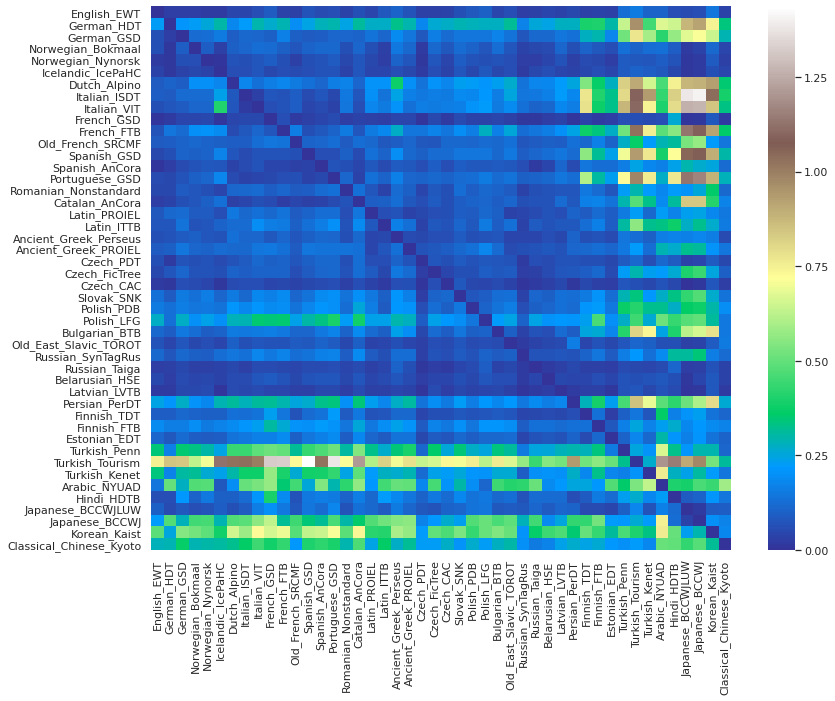

In [72]:
get_heatmap(data, 'mean_yes', n, order)

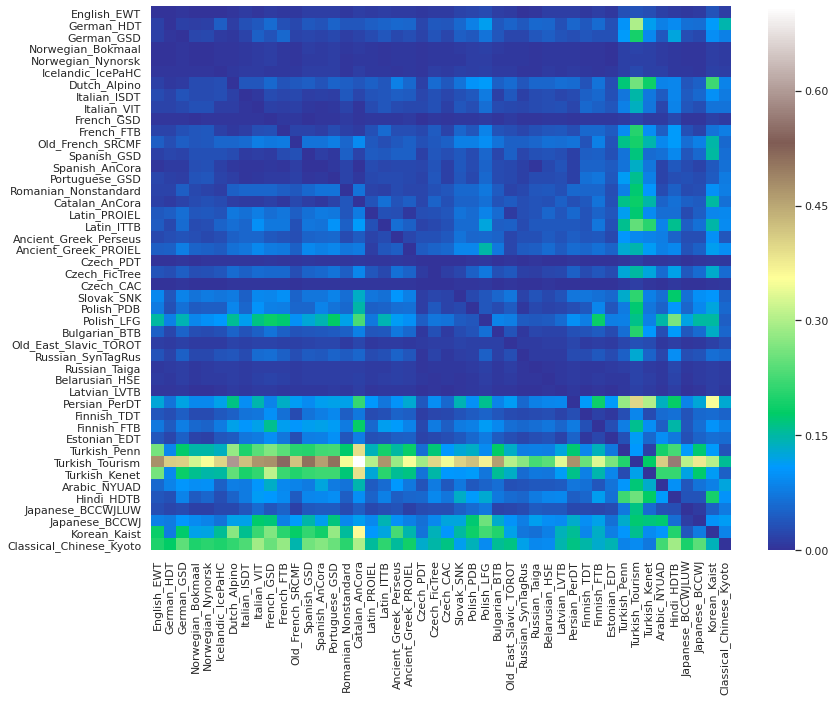

In [73]:
get_heatmap(data, 'mean_yes', n, order, func=stats.gmean)

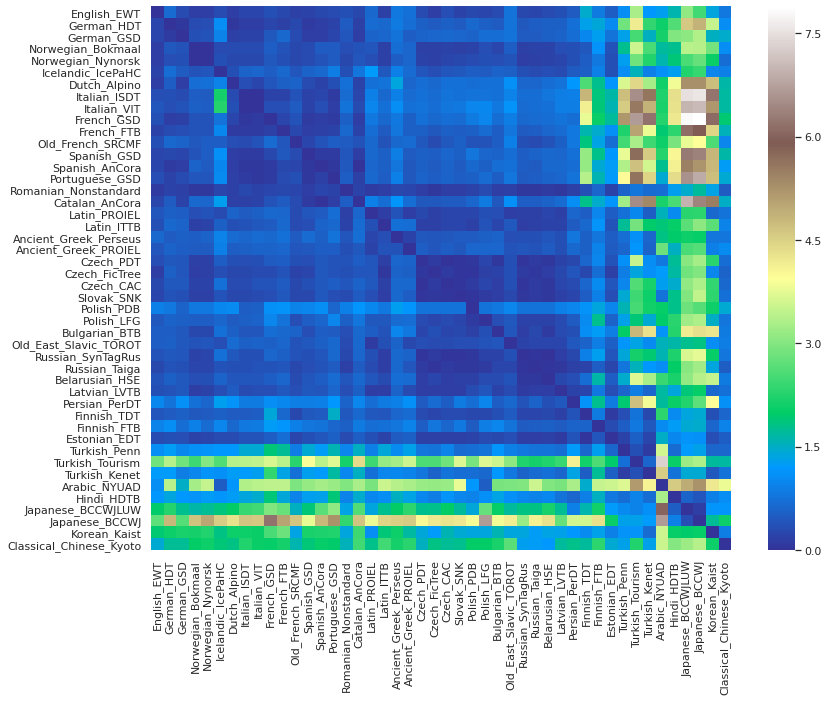

In [74]:
get_heatmap(data, 'width_no', n, order)

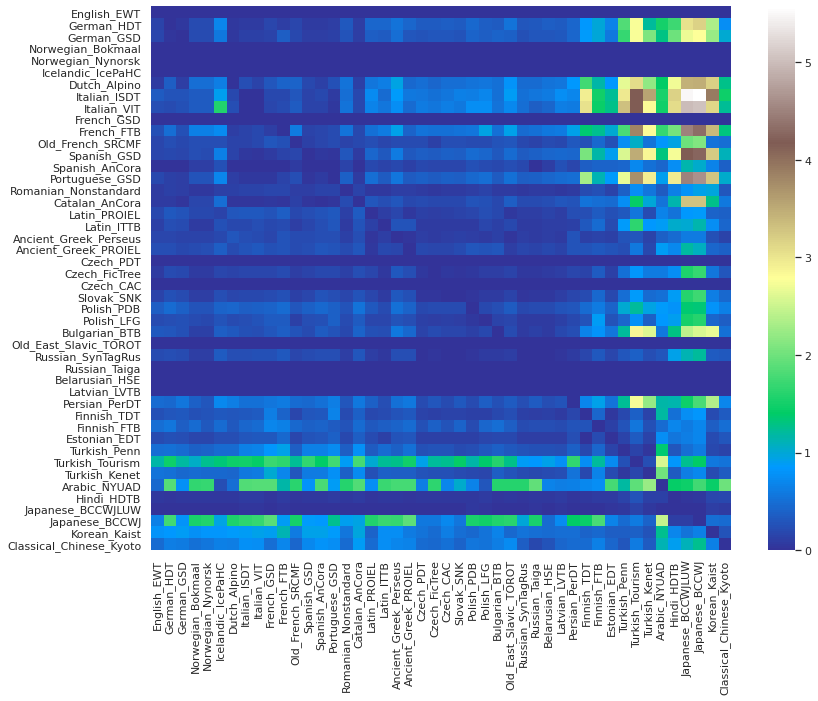

In [75]:
get_heatmap(data, 'width', n, order)

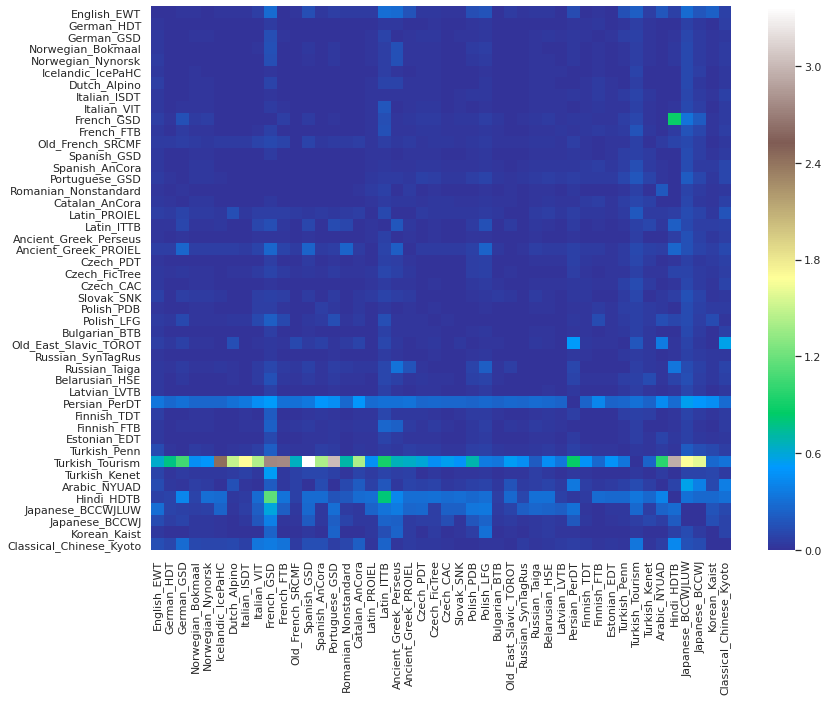

In [76]:
get_heatmap(data, 'depth_no', n, order)

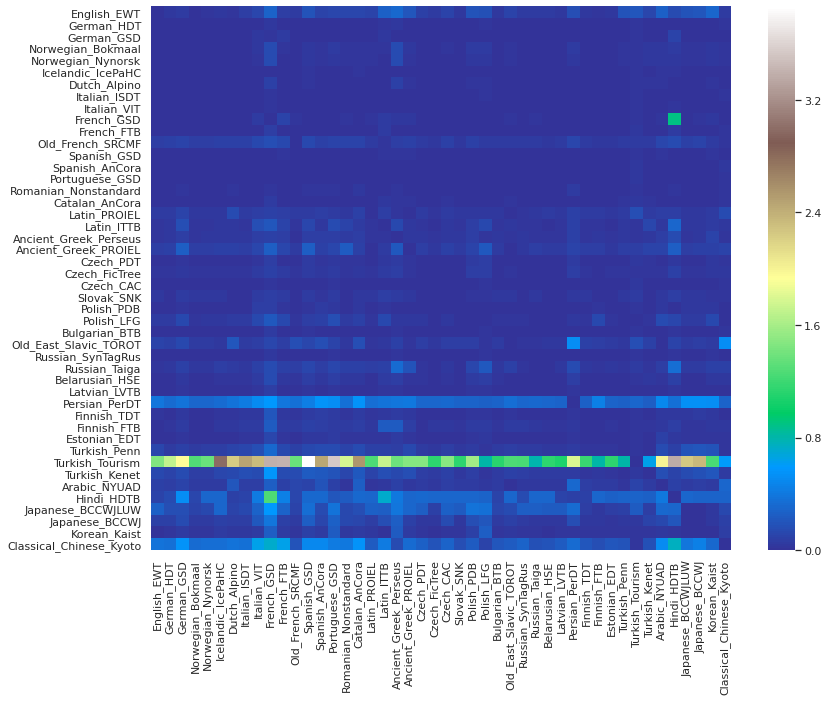

In [77]:
get_heatmap(data, 'depth', n, order)

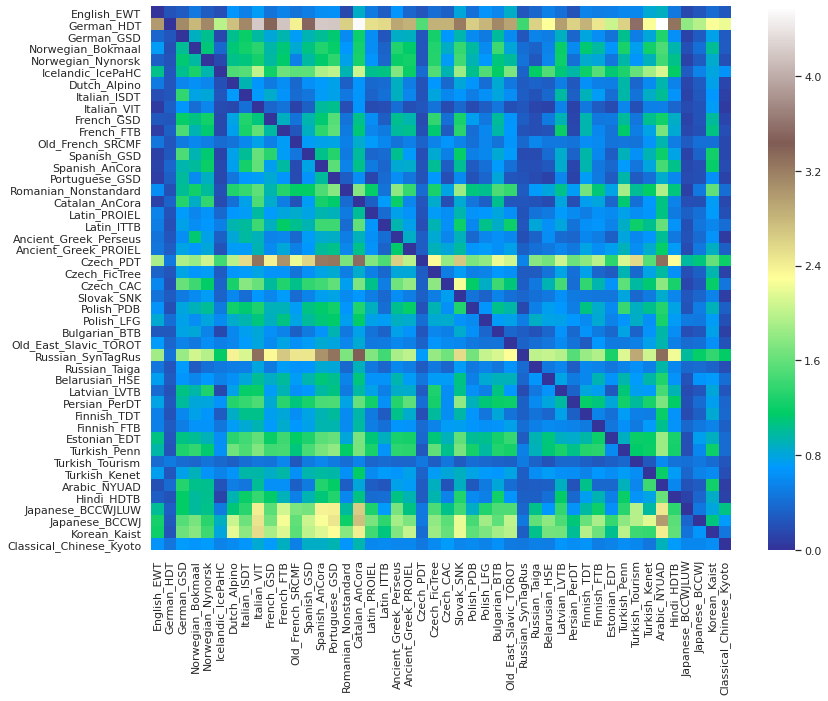

In [78]:
get_heatmap(data, 'size_no', n, order)

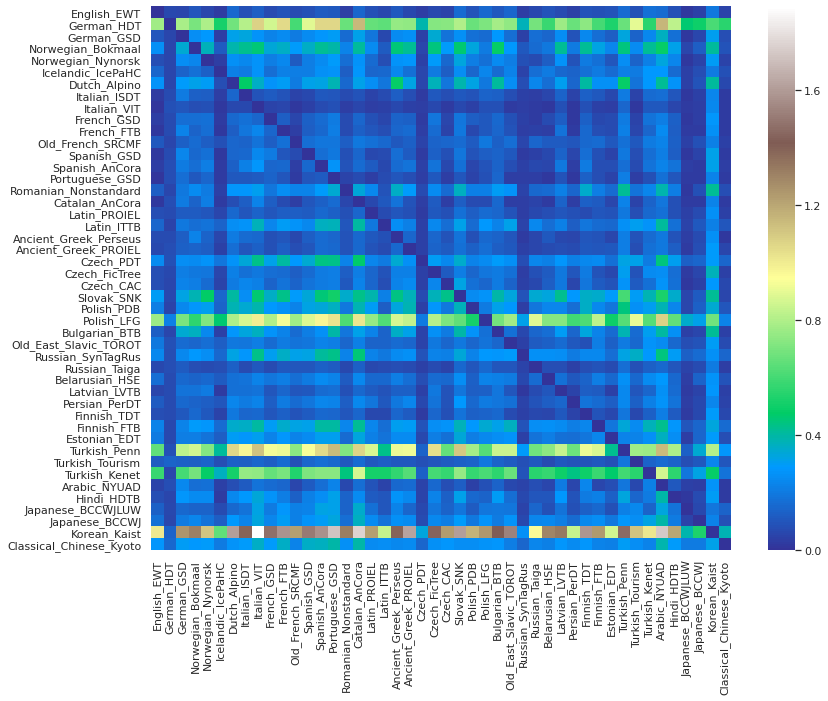

In [79]:
get_heatmap(data, 'size', n, order)

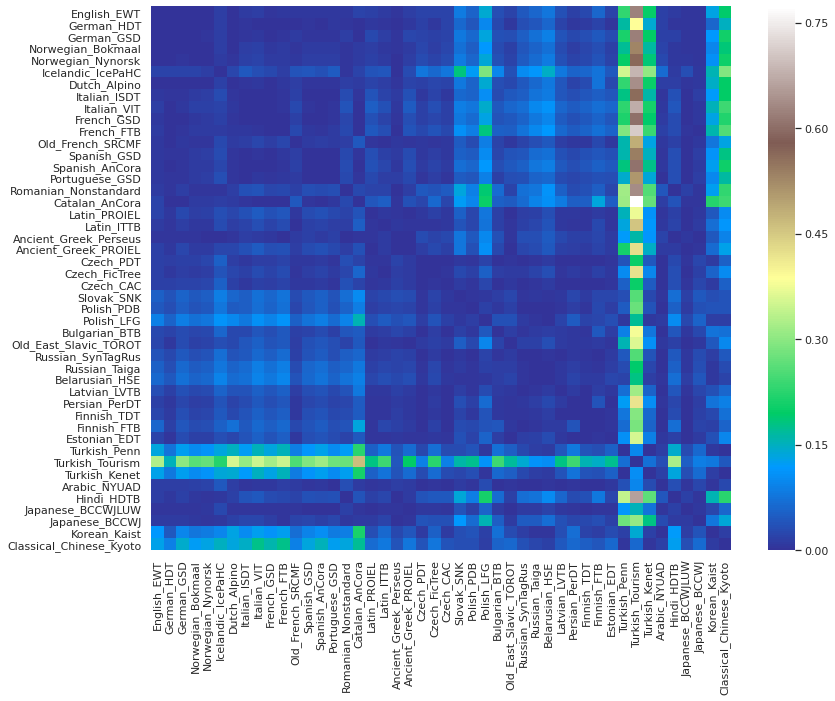

In [80]:
get_heatmap(data, 'sl_no', n, order)

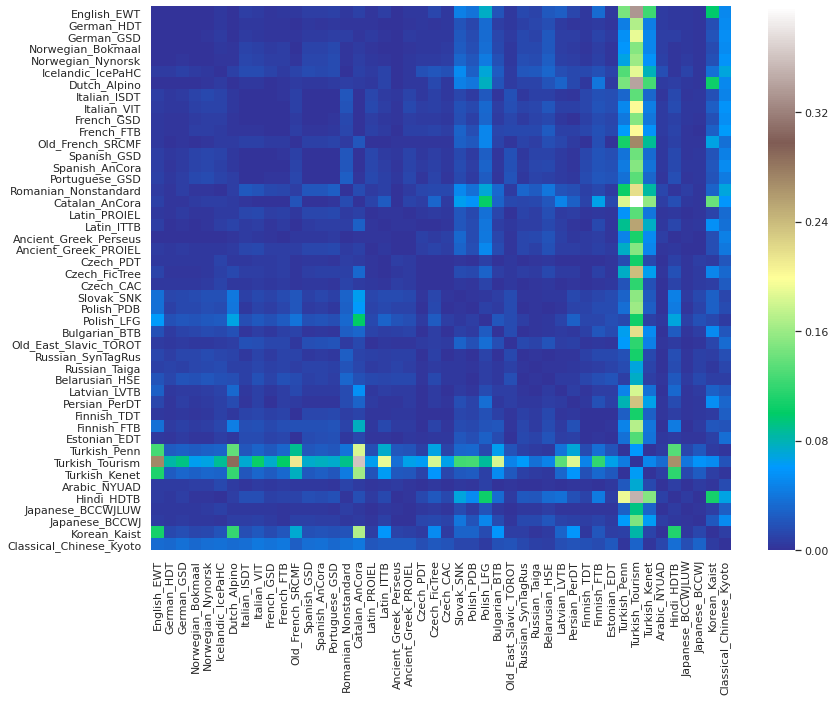

In [81]:
get_heatmap(data, 'sl', n, order)